This notebook will introduce the basics of creating a pyro distribution and
sampling from it. To begin with, we create the standard normal distribution.

In [25]:
import numpy as np
import torch
import pyro

pyro.set_rng_seed(100)
mean = 0.
var = 1.
dist = pyro.distributions.Normal(mean, var)

So far there's nothing special about this. We could have created a Pytorch (or
Tensorflow, etc.) distribution without needing a PPL library. Let's move on to
sampling.

In [6]:
rv_name = "standard_normal"
x = pyro.sample(rv_name, dist)
print(x)

tensor(0.3607)


Note that the `sample` function needs a `name` argument. The output of `sample`
is called a *site*, and the name allows us to refer to the same site from
separate pieces of code. We will see the usefulness of named sites later on.

Sampling a standard normal isn't very interesting, so let's try something more complex.

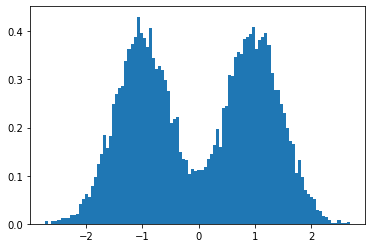

In [30]:
def bimodal():
    mode = pyro.sample('mode', pyro.distributions.Bernoulli(0.5))
    mean = -1. if mode == 0. else 1.
    var = 0.5
    x = pyro.sample('sample', pyro.distributions.Normal(mean, var))
    return x

samples = np.stack([bimodal() for _ in range(10000)])
import matplotlib.pyplot as plt

plt.hist(samples, bins=100, density=True)
plt.show()


Here the function `bimodal` is a hierarchical statistical model. In the first
level of the hierarchy it samples a `0` or `1` from Bernoulli. Then, it samples
one of two Gaussians depending on the value samples from the Bernoulli. As we
might expect, the result is equivalent to sampling from

`0.5 * N(-1, 0.5) + 0.5 * N(1, 0.5)`